In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df=pd.read_csv("Pharma_Industry_A10.csv")
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [3]:
# Basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [4]:
# Check for missing values
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [5]:
df.isin(['?', 'NaN']).sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

array([[<Axes: title={'center': 'Drug Dosage (mg)'}>,
        <Axes: title={'center': 'Systolic Blood Pressure (mmHg)'}>],
       [<Axes: title={'center': 'Heart Rate (BPM)'}>,
        <Axes: title={'center': 'Liver Toxicity Index (U/L)'}>],
       [<Axes: title={'center': 'Blood Glucose Level (mg/dL)'}>,
        <Axes: title={'center': 'Drug Response'}>]], dtype=object)

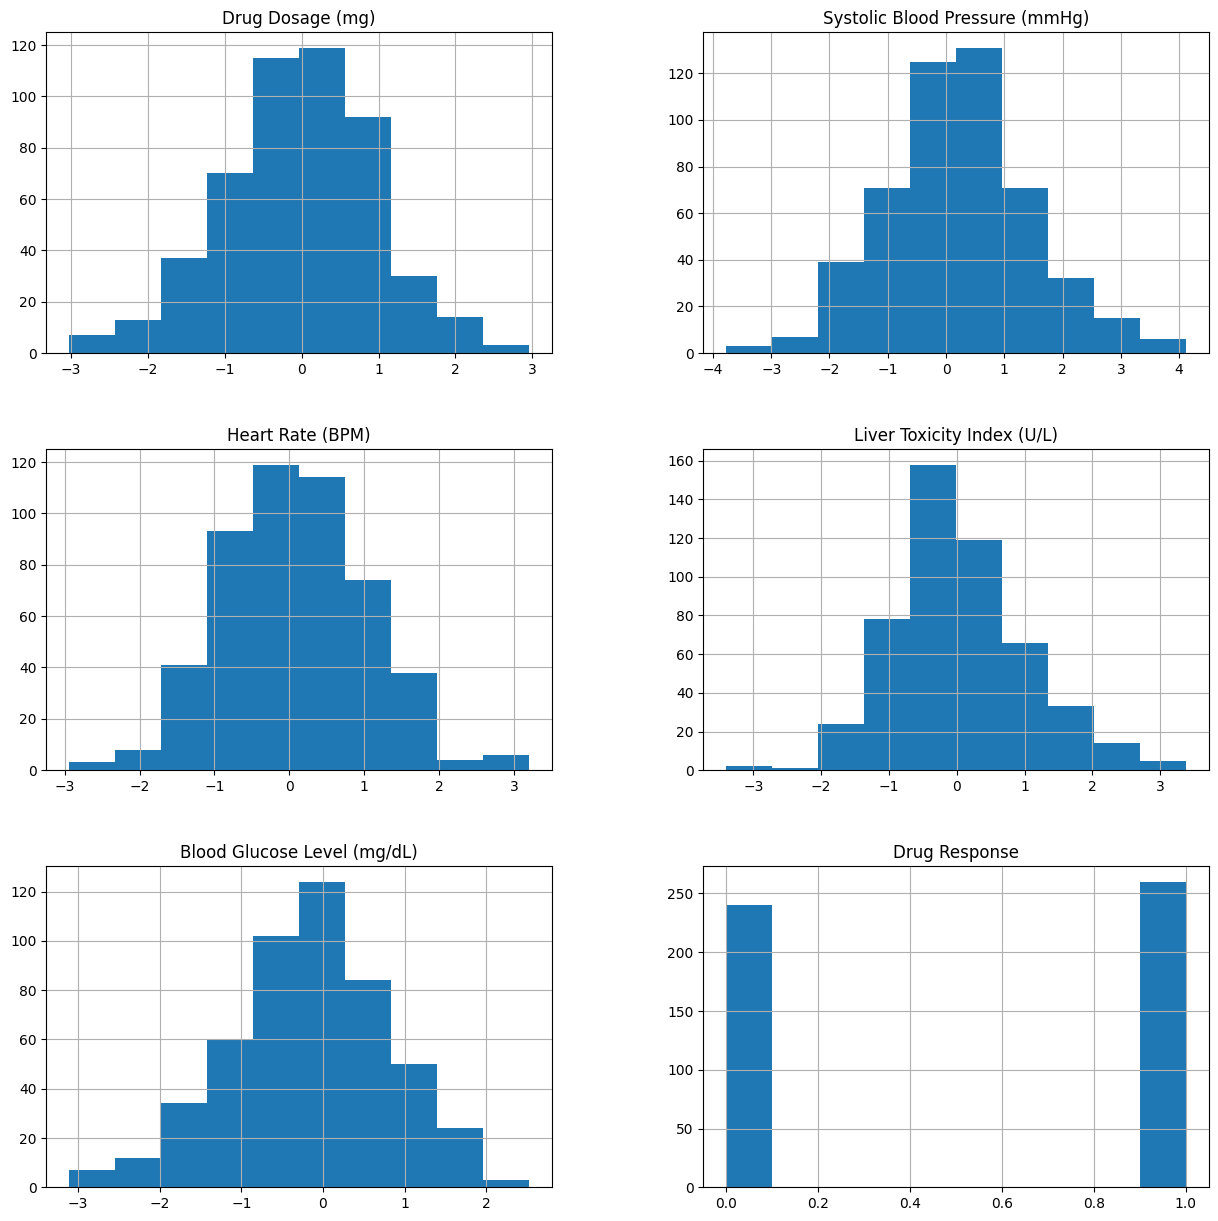

In [6]:
# Histograms
df.hist(figsize=(15,15))

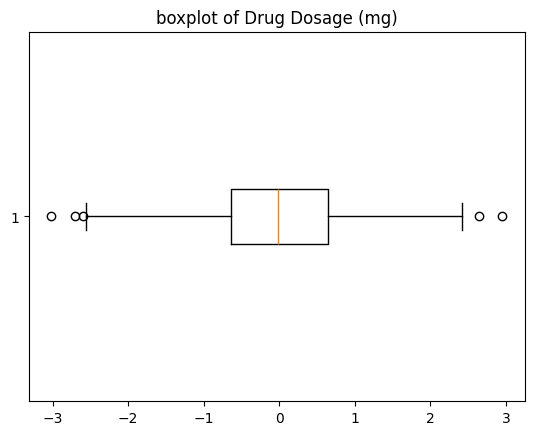

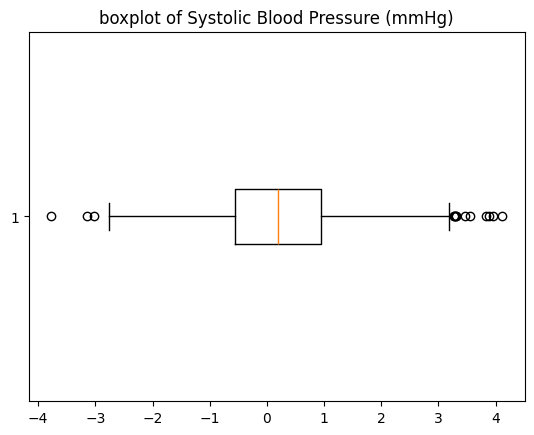

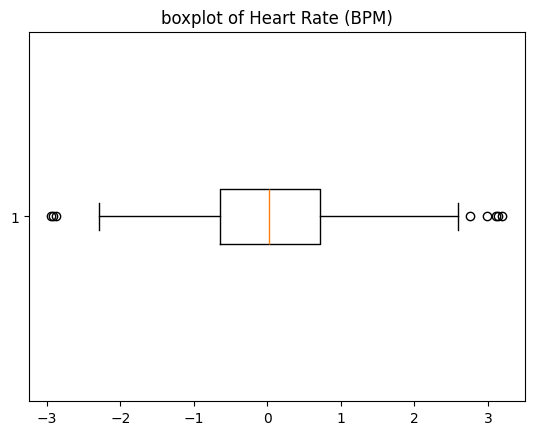

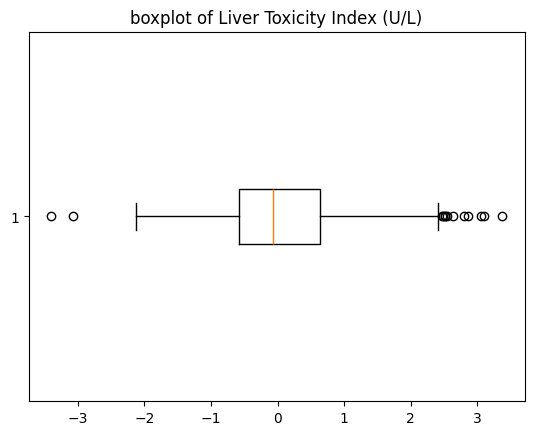

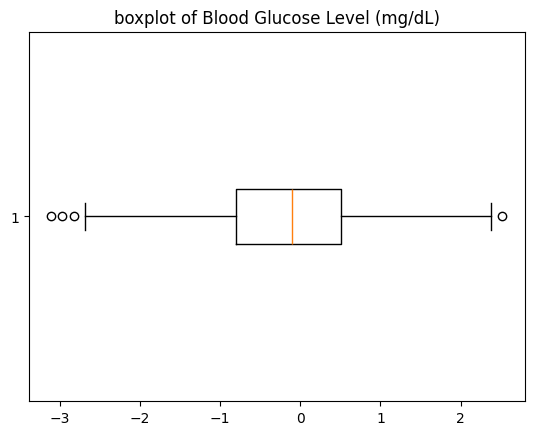

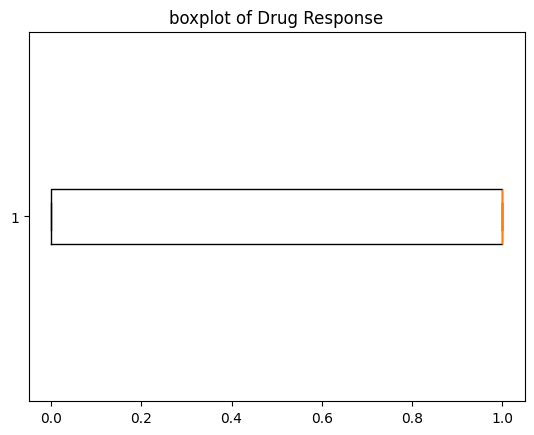

In [7]:
#box plot
for c in df.columns:
        plt.boxplot(df[c],vert=False)  
        plt.title(f"boxplot of {c}")
        plt.show()

In [8]:
df.corr()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.090618,0.040571,0.128127,0.012434,0.043457
Systolic Blood Pressure (mmHg),0.090618,1.000000,-0.039195,0.283672,0.037228,0.305226
Heart Rate (BPM),0.040571,-0.039195,1.000000,0.005818,0.049897,-0.009715
Liver Toxicity Index (U/L),0.128127,0.283672,0.005818,1.000000,0.229474,0.434722
Blood Glucose Level (mg/dL),0.012434,0.037228,0.049897,0.229474,1.000000,0.169342
Drug Response,0.043457,0.305226,-0.009715,0.434722,0.169342,1.000000


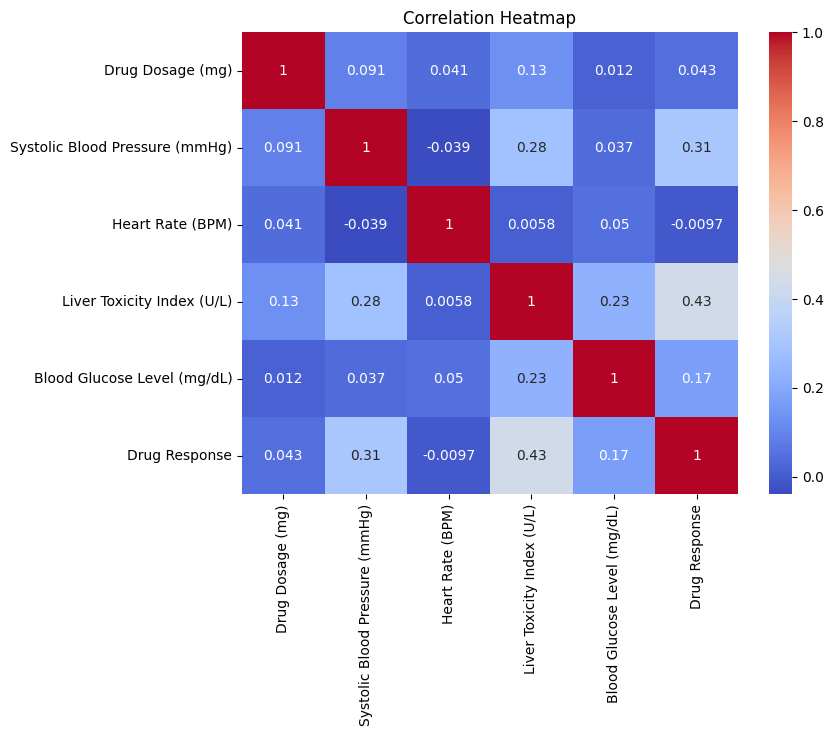

In [9]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#correlation with Drug Response (target variable)
df.corr()['Drug Response'].abs().sort_values(ascending=False)

Drug Response                     1.000000
Liver Toxicity Index (U/L)        0.434722
Systolic Blood Pressure (mmHg)    0.305226
Blood Glucose Level (mg/dL)       0.169342
Drug Dosage (mg)                  0.043457
Heart Rate (BPM)                  0.009715
Name: Drug Response, dtype: float64

In [11]:
# Define features(x) and target(y)
y = df['Drug Response']
x = df.drop(columns=['Drug Response'])

In [12]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)


In [13]:
# Data Visualization

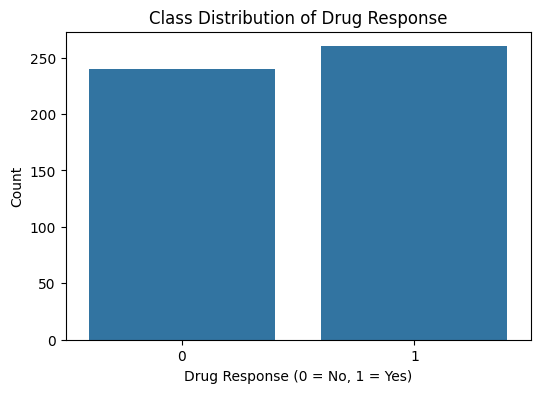

In [14]:
#Class Balance Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Drug Response', data=df)
plt.title('Class Distribution of Drug Response')
plt.xlabel('Drug Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

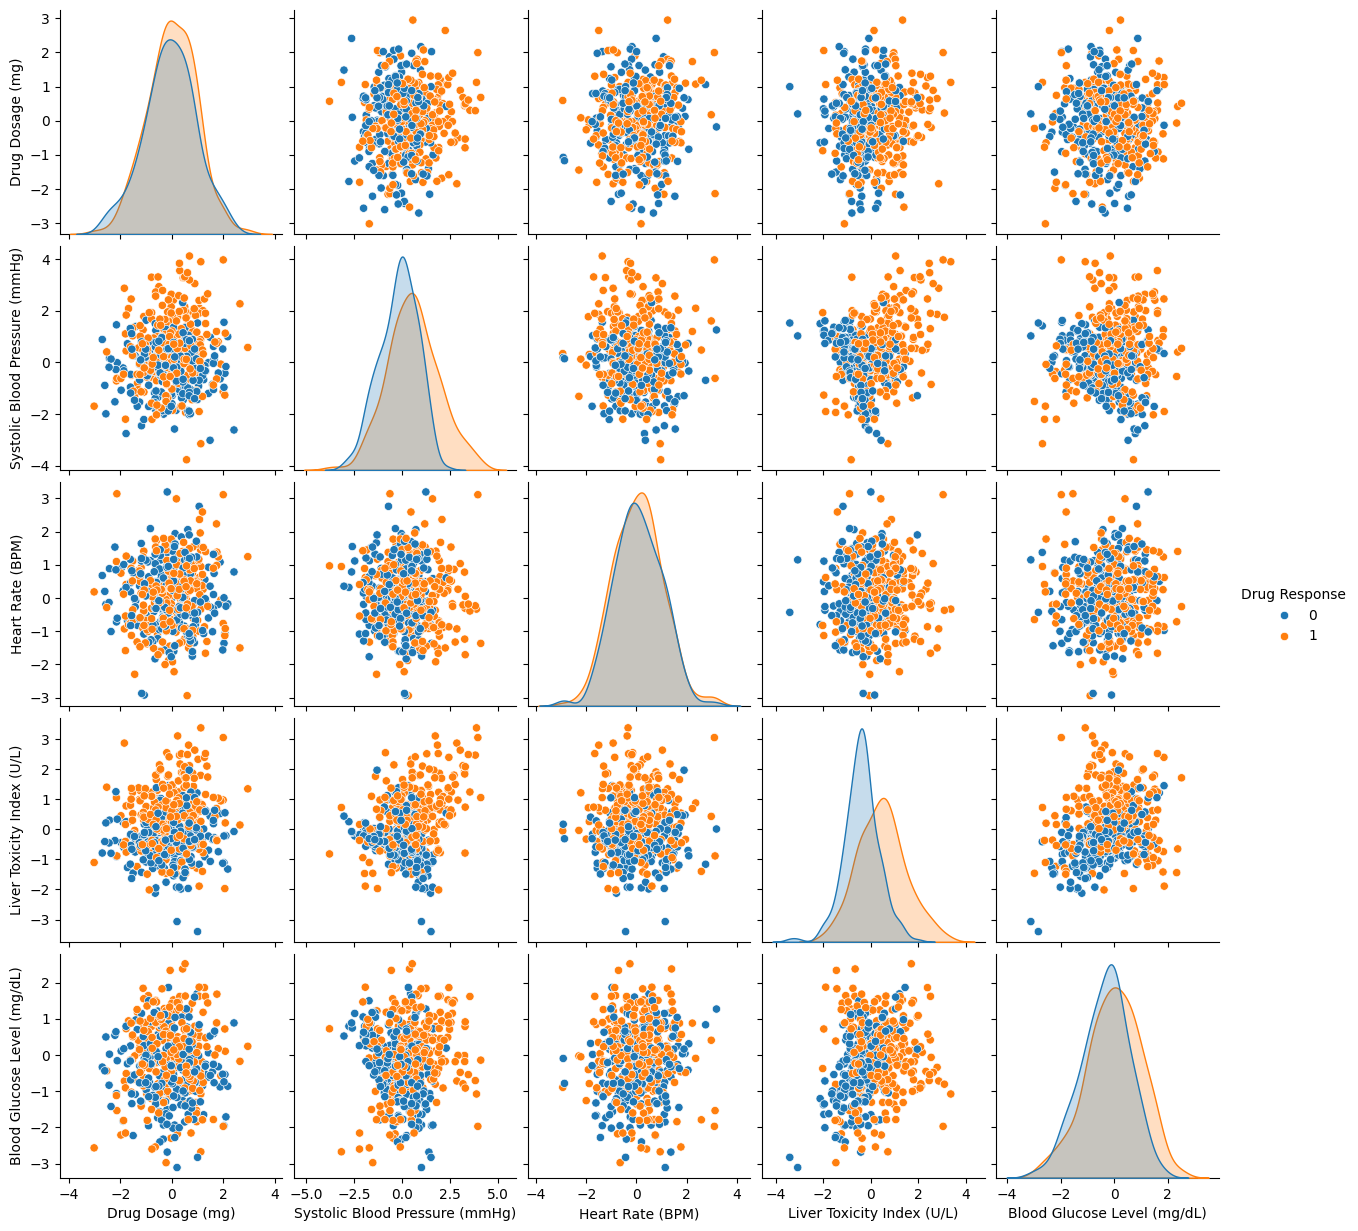

In [15]:
import seaborn as sns
sns.pairplot(df, hue="Drug Response")

In [16]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=200)


In [17]:
#SVM Implementation
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
train_res = {}
test_res = {}

for k in kernels:
    model = SVC(kernel=k)
    model.fit(x_train, y_train)
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    # Accuracy scores
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    train_acc = np.round(accuracy_score(y_train, model.predict(x_train)),2)
    test_acc = np.round(accuracy_score(y_test, model.predict(x_test)),2)
    train_res[k] = train_acc
    test_res[k] = test_acc
    
    # Classification Report
    #print("\nClassification Report (Test Data):")
    #print(classification_report(y_test, y_test_pred))
    
print("================ MODEL-1 ================")
print("Training score :\n", train_res)
print("Test scores :\n", test_res)

================ MODEL-1 ================
Training score :
 {'linear': 0.73, 'poly': 0.75, 'rbf': 0.8}
Test scores :
 {'linear': 0.72, 'poly': 0.7, 'rbf': 0.75}


In [18]:
#By observing the score results, we get to know that RBF gives better results. 
#so, we'll go with (RBF) Radial basis classifier with different c values 
#via cross-validation to get better results



In [19]:
#cross validation 
#using stratified method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, stratify = y,random_state=200)
#SVM Implementation
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=10) #c=0.1, 1, 10(best)
model.fit(x_train,y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("================ MODEL-1 ================")
print("Training score :\n",np.round(accuracy_score(y_train, model.predict(x_train)),2))
print("Test scores :\n", np.round(accuracy_score(y_test, model.predict(x_test)),2))

print("================ Confusion Matrix ================")
print("Train : \n" ,confusion_matrix(y_train, y_train_pred))
print("Test : \n" ,confusion_matrix(y_test, y_test_pred))

print("================ Other Metrics ================")
print("Train : \n" ,classification_report(y_train, y_train_pred))
print("Test : \n" ,classification_report(y_test, y_test_pred))

================ MODEL-1 ================
Training score :
 0.87
Test scores :
 0.77
================ Confusion Matrix ================
Train : 
 [[106  86]
 [ 92 116]]
Test : 
 [[28 20]
 [27 25]]
================ Other Metrics ================
Train : 
               precision    recall  f1-score   support

           0       0.54      0.55      0.54       192
           1       0.57      0.56      0.57       208

    accuracy                           0.56       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.56      0.56      0.56       400

Test : 
               precision    recall  f1-score   support

           0       0.51      0.58      0.54        48
           1       0.56      0.48      0.52        52

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.53      0.53      0.53       100



In [20]:
#cross validation 
# Set up K-Fold cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate

kf = ShuffleSplit(n_splits=5,test_size=0.2,random_state=200)
model = SVC(kernel='rbf',C=10) 

cv_results = cross_validate(model, x, y, cv=kf, scoring='accuracy', return_train_score=True)
print("================ MODEL-1 ================")
print("Mean Train Accuracy:", np.round(cv_results['train_score'].mean(), 2))
print("Mean Test Accuracy:", np.round(cv_results['test_score'].mean(), 2))


================ MODEL-1 ================
Mean Train Accuracy: 0.87
Mean Test Accuracy: 0.75


In [21]:
#still will try to build best model
#By reducing X features with respective Y and X features correlation

<Axes: >

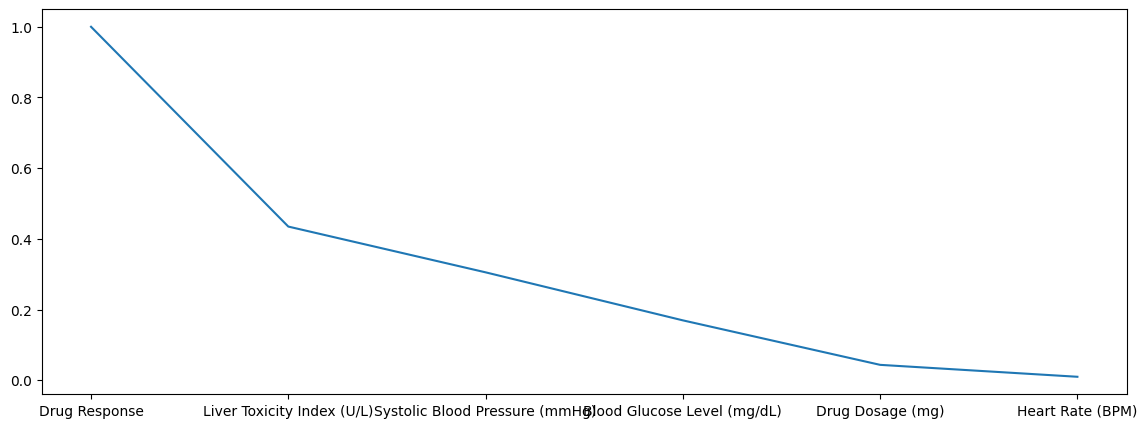

In [22]:
#correlation with Drug Response (target)
df.corr()['Drug Response'].abs().sort_values(ascending=False).plot(figsize=(14,5))

In [23]:
# Defining features(x)
x = df.drop(columns=['Drug Response','Heart Rate (BPM)'])


In [24]:
#SVM Implementation
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
train_res = {}
test_res = {}

for k in kernels:
    model2 = SVC(kernel=k)
    model2.fit(x_train, y_train)
    # Predictions
    y_train_pred = model2.predict(x_train)
    y_test_pred = model2.predict(x_test)
    # Accuracy scores
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    train_acc = np.round(accuracy_score(y_train, model2.predict(x_train)),2)
    test_acc = np.round(accuracy_score(y_test, model2.predict(x_test)),2)
    train_res[k] = train_acc
    test_res[k] = test_acc
    
print("================ MODEL-2 ================")   
print("Training score :\n", train_res)
print("Test scores :\n", test_res)

================ MODEL-2 ================
Training score :
 {'linear': 0.72, 'poly': 0.76, 'rbf': 0.79}
Test scores :
 {'linear': 0.74, 'poly': 0.74, 'rbf': 0.78}


In [25]:
#splitting data into train and test with stratify cross validation 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, stratify = y,random_state=200)

#SVM Implementation
from sklearn.svm import SVC
model2 = SVC(kernel='rbf',C=100) #c=0.1, 1, 10, 100(best)
model2.fit(x_train,y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("================ MODEL-2 ================")
print("Training score :\n",np.round(accuracy_score(y_train, model2.predict(x_train)),2))
print("Test scores :\n", np.round(accuracy_score(y_test, model2.predict(x_test)),2))

print("================ Confusion Matrix ================")
print("Train : \n" ,confusion_matrix(y_train, y_train_pred))
print("Test : \n" ,confusion_matrix(y_test, y_test_pred))

print("================ Other Metrics ================")
print("Train : \n" ,classification_report(y_train, y_train_pred))
print("Test : \n" ,classification_report(y_test, y_test_pred))

================ MODEL-2 ================
Training score :
 0.9
Test scores :
 0.82
================ Confusion Matrix ================
Train : 
 [[156  36]
 [ 47 161]]
Test : 
 [[36 12]
 [10 42]]
================ Other Metrics ================
Train : 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       192
           1       0.82      0.77      0.80       208

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

Test : 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.78      0.81      0.79        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [ ]:
"""

================ MODEL-1 ================
Training score :
 0.87
Test scores :
 0.77

================ MODEL-2 ================
Training score :
 0.9
Test scores :
 0.82

"""